In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_line(line):
    """Parse a line into a dictionary of key-value pairs."""
    line_data = {}
    parts = line.split(',')
    for part in parts:
        key, value = part.split('=')
        key = key.strip()
        value = value.strip()
        if key == "time" or "time" in key:
            value = float(value.split()[0])  # Remove "ms" if present
        elif key == "N" or "dim" in key:
            value = int(value)
        elif key == "max_iter":
            value = float(value)
        line_data[key] = value
    return line_data

def compute_acceleration(file1_lines, file2_lines, exclude_dim_origin):
    """Compute acceleration factors, excluding specified dim_origin values."""
    acceleration_factors = []
    file2_dict = {
        (line["N"], line["dim_origin"], line["dim_k"]): line
        for line in map(parse_line, file2_lines)
    }
    for line1 in file1_lines:
        parsed_line1 = parse_line(line1)
        if parsed_line1["dim_origin"] in exclude_dim_origin:
            continue  # Skip excluded dim_origin values
        key = (parsed_line1["N"], parsed_line1["dim_origin"], parsed_line1["dim_k"])
        if key in file2_dict:
            file2_line = file2_dict[key]
            acceleration = file2_line["time"] / parsed_line1["topk time"]
            acceleration_factors.append({
                "dim_origin": parsed_line1["dim_origin"],
                "max_iter": parsed_line1["max_iter"],
                "acceleration_factor": acceleration
            })
    return acceleration_factors

def compute_average_acceleration_by_dim_origin(acceleration_factors):
    """Compute the average acceleration factor grouped by dim_origin and max_iter."""
    grouped_dict = defaultdict(lambda: defaultdict(list))
    for entry in acceleration_factors:
        grouped_dict[entry["dim_origin"]][entry["max_iter"]].append(entry["acceleration_factor"])
    
    # Compute the average acceleration for each group
    average_acceleration_by_group = {
        dim_origin: {
            max_iter: sum(values) / len(values)
            for max_iter, values in max_iter_dict.items()
        }
        for dim_origin, max_iter_dict in grouped_dict.items()
    }
    return average_acceleration_by_group

def read_multiple_files(file_list):
    """Read and combine lines from multiple files."""
    combined_lines = []
    for file_path in file_list:
        if file_path:  # Skip empty or undefined file paths
            with open(file_path, 'r') as file:
                combined_lines += file.readlines()
    return combined_lines

# File lists
# file1_list = ["output_all_shared_early_stop_min_template_8192_e0_new.txt",]
# file1_list = ["output_all_shared_early_stop_template_8192_e0_new_0313_30.txt",]
file1_list = ["output3000.txt",]
# file1_list = ["output_all_shared_precision_min_template_8192_e-16.txt",]
file2_list = ["output_torch_template_8192.txt"]

# Exclude specific dim_origin values
exclude_dim_origin = []  # Example values, adjust as needed

# Read and combine lines from all parts
file1_lines = read_multiple_files(file1_list)
file2_lines = read_multiple_files(file2_list)

# Compute the acceleration factors
acceleration_results = compute_acceleration(file1_lines, file2_lines, exclude_dim_origin)

# Compute the average acceleration factors by dim_origin and max_iter
average_acceleration_by_dim_origin = compute_average_acceleration_by_dim_origin(acceleration_results)

# Specify the max_iter values to include in the plot
max_iter_list = [2, 5, 8, 200]

# Filter data to include only specified max_iter values
filtered_acceleration_by_dim_origin = {
    dim_origin: {max_iter: value for max_iter, value in max_iter_dict.items() if max_iter in max_iter_list}
    for dim_origin, max_iter_dict in average_acceleration_by_dim_origin.items()
}


# Prepare data for plotting
dim_origins = sorted(filtered_acceleration_by_dim_origin.keys())
max_iters = sorted(max_iter_list)




# Plot each max_iter as a separate line
plt.figure(figsize=(10, 6))
for max_iter in max_iters:
    y_values = [filtered_acceleration_by_dim_origin[dim_origin].get(max_iter, 0) for dim_origin in dim_origins]
    if max_iter == 200:
        _label="No Early Stopping"
    else:
        _label=f"max_iter = {max_iter}"

        
    plt.plot(dim_origins, y_values, marker='o', label = _label)

# Add a horizontal dashed line at y = 1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Configure the plot
plt.title("Speedup by M and Selected max_iter")
plt.xlabel("M")
plt.ylabel("Speedup")
plt.xticks(dim_origins, rotation=90)  # Rotate x-ticks for better readability
plt.xlim([120, 8200])  # Set x-axis range
# plt.ylim([0, 50])      # Set y-axis range
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20], labels=["1", "2", "5", "10", "20"])

plt.legend()
plt.grid(True)

plt.savefig("speedup_for_max_iter_new10.png", bbox_inches='tight')


# Show the plot
plt.show()

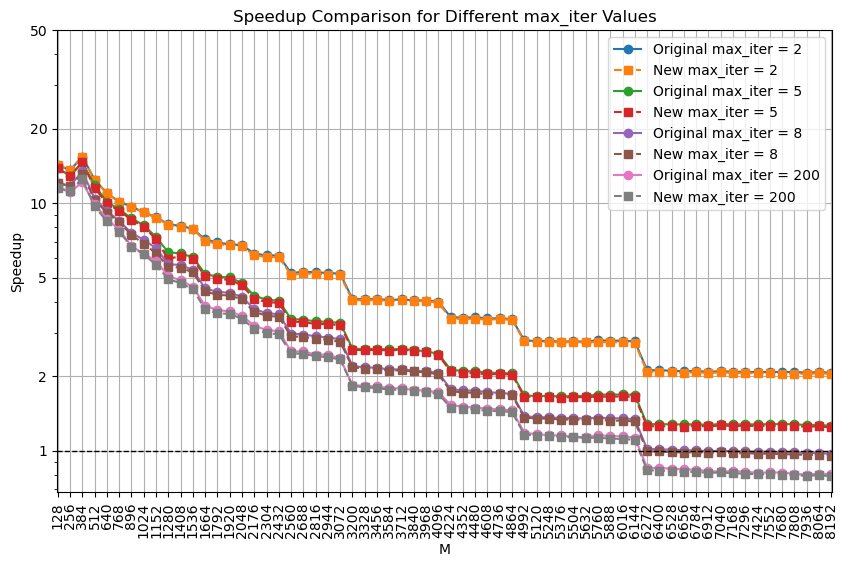

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_line(line):
    """Parse a line into a dictionary of key-value pairs."""
    line_data = {}
    parts = line.split(',')
    for part in parts:
        key, value = part.split('=')
        key = key.strip()
        value = value.strip()
        if key == "time" or "time" in key:
            value = float(value.split()[0])  # Remove "ms" if present
        elif key == "N" or "dim" in key:
            value = int(value)
        elif key == "max_iter":
            value = float(value)
        line_data[key] = value
    return line_data

def compute_acceleration(file1_lines, file2_lines, exclude_dim_origin):
    """Compute acceleration factors, excluding specified dim_origin values."""
    acceleration_factors = []
    file2_dict = {
        (line["N"], line["dim_origin"], line["dim_k"]): line
        for line in map(parse_line, file2_lines)
    }
    for line1 in file1_lines:
        parsed_line1 = parse_line(line1)
        if parsed_line1["dim_origin"] in exclude_dim_origin:
            continue  # Skip excluded dim_origin values
        key = (parsed_line1["N"], parsed_line1["dim_origin"], parsed_line1["dim_k"])
        if key in file2_dict:
            file2_line = file2_dict[key]
            acceleration = file2_line["time"] / parsed_line1["topk time"]
            acceleration_factors.append({
                "dim_origin": parsed_line1["dim_origin"],
                "max_iter": parsed_line1["max_iter"],
                "acceleration_factor": acceleration
            })
    return acceleration_factors

def compute_average_acceleration_by_dim_origin(acceleration_factors):
    """Compute the average acceleration factor grouped by dim_origin and max_iter."""
    grouped_dict = defaultdict(lambda: defaultdict(list))
    for entry in acceleration_factors:
        grouped_dict[entry["dim_origin"]][entry["max_iter"]].append(entry["acceleration_factor"])
    
    # Compute the average acceleration for each group
    average_acceleration_by_group = {
        dim_origin: {
            max_iter: sum(values) / len(values)
            for max_iter, values in max_iter_dict.items()
        }
        for dim_origin, max_iter_dict in grouped_dict.items()
    }
    return average_acceleration_by_group

def read_multiple_files(file_list):
    """Read and combine lines from multiple files."""
    combined_lines = []
    for file_path in file_list:
        if file_path:  # Skip empty or undefined file paths
            with open(file_path, 'r') as file:
                combined_lines += file.readlines()
    return combined_lines

# File lists
# file1_list = ["output_all_shared_early_stop_template_8192_e0_new_0313_30.txt"]
file1_list = ["output1000.txt"]
file1new_list = ["output3000.txt"]  # Replace with actual new file
file2_list = ["output_torch_template_8192.txt"]

# Exclude specific dim_origin values
exclude_dim_origin = []  # Adjust as needed

# Read and combine lines from all parts
file1_lines = read_multiple_files(file1_list)
file1new_lines = read_multiple_files(file1new_list)
file2_lines = read_multiple_files(file2_list)

# Compute the acceleration factors
acceleration_results = compute_acceleration(file1_lines, file2_lines, exclude_dim_origin)
acceleration_results_new = compute_acceleration(file1new_lines, file2_lines, exclude_dim_origin)

# Compute the average acceleration factors by dim_origin and max_iter
average_acceleration_by_dim_origin = compute_average_acceleration_by_dim_origin(acceleration_results)
average_acceleration_by_dim_origin_new = compute_average_acceleration_by_dim_origin(acceleration_results_new)

# Specify the max_iter values to include in the plot
max_iter_list = [2, 5, 8, 200]

# Filter data to include only specified max_iter values
filtered_acceleration_by_dim_origin = {
    dim_origin: {max_iter: value for max_iter, value in max_iter_dict.items() if max_iter in max_iter_list}
    for dim_origin, max_iter_dict in average_acceleration_by_dim_origin.items()
}

filtered_acceleration_by_dim_origin_new = {
    dim_origin: {max_iter: value for max_iter, value in max_iter_dict.items() if max_iter in max_iter_list}
    for dim_origin, max_iter_dict in average_acceleration_by_dim_origin_new.items()
}

# Prepare data for plotting
dim_origins = sorted(set(filtered_acceleration_by_dim_origin.keys()) | set(filtered_acceleration_by_dim_origin_new.keys()))
max_iters = sorted(max_iter_list)

# Plot each max_iter as a separate line
plt.figure(figsize=(10, 6))
for max_iter in max_iters:
    y_values = [filtered_acceleration_by_dim_origin.get(dim_origin, {}).get(max_iter, 0) for dim_origin in dim_origins]
    plt.plot(dim_origins, y_values, marker='o', linestyle='-', label=f"Original max_iter = {max_iter}")
    
    y_values_new = [filtered_acceleration_by_dim_origin_new.get(dim_origin, {}).get(max_iter, 0) for dim_origin in dim_origins]
    plt.plot(dim_origins, y_values_new, marker='s', linestyle='--', label=f"New max_iter = {max_iter}")

# Add a horizontal dashed line at y = 1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Configure the plot
plt.title("Speedup Comparison for Different max_iter Values")
plt.xlabel("M")
plt.ylabel("Speedup")
plt.xticks(dim_origins, rotation=90)  # Rotate x-ticks for better readability
plt.xlim([120, 8200])  # Set x-axis range
# plt.ylim([0, 50])      # Set y-axis range
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50], labels=["1", "2", "5", "10", "20", "50"])
plt.legend()
plt.grid(True)

plt.savefig("speedup_comparison.pdf", bbox_inches="tight")

# Show the plot
plt.show()


In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_line(line):
    """Parse a line into a dictionary of key-value pairs."""
    line_data = {}
    parts = line.split(',')
    for part in parts:
        key, value = part.split('=')
        key = key.strip()
        value = value.strip()
        if key == "time" or "time" in key:
            value = float(value.split()[0])  # Remove "ms" if present
        elif key == "N" or "dim" in key:
            value = int(value)
        elif key == "max_iter":
            value = float(value)
        line_data[key] = value
    return line_data

def compute_acceleration(file1_lines, file2_lines, exclude_dim_origin):
    """Compute acceleration factors, excluding specified dim_origin values."""
    acceleration_factors = []
    file2_dict = {
        (line["N"], line["dim_origin"], line["dim_k"]): line
        for line in map(parse_line, file2_lines)
    }
    for line1 in file1_lines:
        parsed_line1 = parse_line(line1)
        if parsed_line1["dim_origin"] in exclude_dim_origin:
            continue  # Skip excluded dim_origin values
        key = (parsed_line1["N"], parsed_line1["dim_origin"], parsed_line1["dim_k"])
        if key in file2_dict:
            file2_line = file2_dict[key]
            acceleration = file2_line["time"] / parsed_line1["topk time"]
            acceleration_factors.append({
                "dim_origin": parsed_line1["dim_origin"],
                "max_iter": parsed_line1["max_iter"],
                "acceleration_factor": acceleration
            })
    return acceleration_factors

def compute_average_acceleration_by_dim_origin(acceleration_factors):
    """Compute the average acceleration factor grouped by dim_origin and max_iter."""
    grouped_dict = defaultdict(lambda: defaultdict(list))
    for entry in acceleration_factors:
        grouped_dict[entry["dim_origin"]][entry["max_iter"]].append(entry["acceleration_factor"])
    
    # Compute the average acceleration for each group
    average_acceleration_by_group = {
        dim_origin: {
            max_iter: sum(values) / len(values)
            for max_iter, values in max_iter_dict.items()
        }
        for dim_origin, max_iter_dict in grouped_dict.items()
    }
    return average_acceleration_by_group

def read_multiple_files(file_list):
    """Read and combine lines from multiple files."""
    combined_lines = []
    for file_path in file_list:
        if file_path:  # Skip empty or undefined file paths
            with open(file_path, 'r') as file:
                combined_lines += file.readlines()
    return combined_lines

# File lists
file1_list = ["output1100.txt",]
file2_list = ["output_torch_template_8192.txt"]

# Exclude specific dim_origin values
exclude_dim_origin = []  # Example values, adjust as needed

# Read and combine lines from all parts
file1_lines = read_multiple_files(file1_list)
file2_lines = read_multiple_files(file2_list)

# Compute the acceleration factors
acceleration_results = compute_acceleration(file1_lines, file2_lines, exclude_dim_origin)

# Compute the average acceleration factors by dim_origin and max_iter
average_acceleration_by_dim_origin = compute_average_acceleration_by_dim_origin(acceleration_results)

# Specify the max_iter values to include in the plot
max_iter_list = [1e-4, 0, 1e-16]

# Filter data to include only specified max_iter values
filtered_acceleration_by_dim_origin = {
    dim_origin: {max_iter: value for max_iter, value in max_iter_dict.items() if max_iter in max_iter_list}
    for dim_origin, max_iter_dict in average_acceleration_by_dim_origin.items()
}

# Prepare data for plotting
dim_origins = sorted(filtered_acceleration_by_dim_origin.keys())
max_iters = sorted(max_iter_list, reverse=True)



# Plot each max_iter as a separate line
plt.figure(figsize=(10, 6))
for max_iter in max_iters:
    y_values = [filtered_acceleration_by_dim_origin[dim_origin].get(max_iter, 0) for dim_origin in dim_origins]
    # if max_iter == 50:
    #     _label="No Early Stopping"
    # else:
    _label=f"$\epsilon = {max_iter}$"

        
    plt.plot(dim_origins, y_values, marker='o', label = _label)

# Add a horizontal dashed line at y = 1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# Configure the plot
plt.title("Speedup by M and Selected Precision, No Early Stopping")
plt.xlabel("M")
plt.ylabel("Speedup")
plt.xticks(dim_origins, rotation=90)  # Rotate x-ticks for better readability
plt.xlim([120, 8200])  # Set x-axis range
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20], labels=["1", "2", "5", "10", "20"])
plt.legend()
plt.grid(True)

plt.savefig("speedup_for_precision_new.pdf", bbox_inches='tight')

# Show the plot
plt.show()